## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [17]:
plt.rcParams['figure.figsize']=[15,8]

## Question 1

#### Read the iris.csv file

In [18]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [19]:
df.isnull().sum() #Thre are few missing values.

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [20]:
df.shape

(152, 6)

In [21]:
med=df.median()

In [22]:
df.fillna(value=med,inplace=True)
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [23]:
df.info()
#Id is unnecessary for evaluation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             152 non-null    int64  
 1   SepalLengthCm  152 non-null    float64
 2   SepalWidthCm   152 non-null    float64
 3   PetalLengthCm  152 non-null    float64
 4   PetalWidthCm   152 non-null    float64
 5   Species        152 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
df.drop('Id',1,inplace=True)

In [25]:
df.Species.value_counts()

Iris-virginica     52
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [36]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
Spe_enc=OE.fit_transform(df[['Species']])
Spe_enc=pd.DataFrame(Spe_enc)
#Spe_enc
df_num=df.select_dtypes('number')

df_t=pd.concat([df_num,Spe_enc],1)

df_t.rename(columns={0:'Species_Encoded'},inplace=True)

df_t.Species_Encoded.value_counts()

2.0    52
0.0    50
1.0    50
Name: Species_Encoded, dtype: int64

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [44]:
ed=dict()
for i in df_t.columns:
    cor=df_t[['Species_Encoded',i]].corr().iloc[0,1]
    ed[i]=cor
    
ed
    

{'SepalLengthCm': 0.7750606667551097,
 'SepalWidthCm': -0.4173184597220211,
 'PetalLengthCm': 0.9444772875268406,
 'PetalWidthCm': 0.9525128985586725,
 'Species_Encoded': 1.0}

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [47]:
df_t.var()
#no such column.

SepalLengthCm      0.676645
SepalWidthCm       0.185552
PetalLengthCm      3.076516
PetalWidthCm       0.577141
Species_Encoded    0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

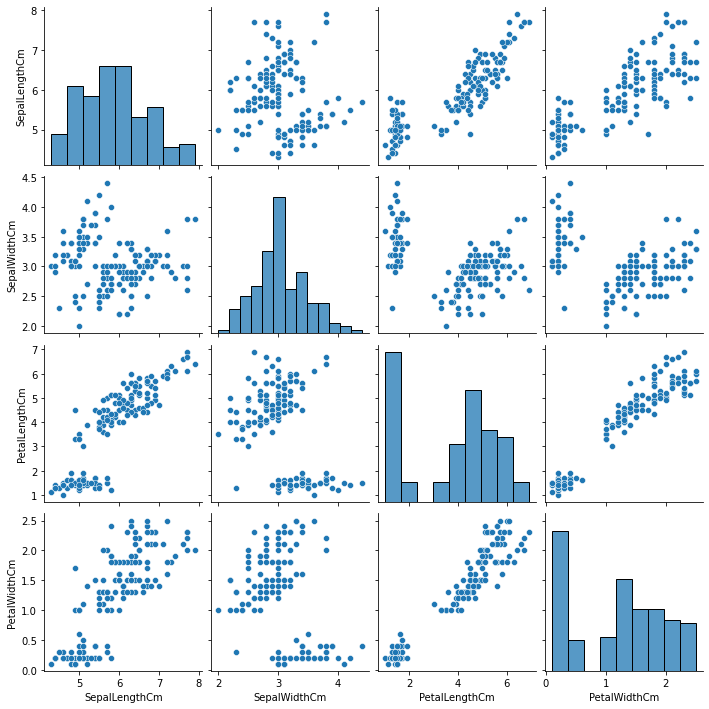

In [48]:
sns.pairplot(df_t.drop('Species_Encoded',1))

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [52]:
X=df_t.drop('Species_Encoded',1)
y=df_t['Species_Encoded']

In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=1,test_size=0.2)

In [59]:
knn8=KNeighborsClassifier(n_neighbors=3)
knn8.fit(xtrain,ytrain)
y_pred=knn8.predict(xtest)
acc=accuracy_score(ytest,y_pred)
acc

1.0

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
from sklearn.neighbors import KNeighborsClassifier

ed=dict()
for i in [3,5,9]:
    knn8=KNeighborsClassifier(n_neighbors=i)
    knn8.fit(xtrain,ytrain)
    y_pred=knn8.predict(xtest)
    acc=accuracy_score(ytest,y_pred)
    ed[i]=acc
    
ed



{3: 1.0, 5: 1.0, 9: 1.0}

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [61]:
from sklearn.model_selection import cross_val_score

In [71]:
ed=dict()
for i in range(1,20,2):
    knn9=KNeighborsClassifier(n_neighbors=i)

    scores=cross_val_score(estimator=knn9,X=xtrain,y=ytrain,scoring='accuracy')
    
    acc=scores.mean()
    
    MSE=1-acc
    
    ed[i]=MSE

ed

{1: 0.06633333333333336,
 3: 0.07466666666666666,
 5: 0.08266666666666667,
 7: 0.057666666666666755,
 9: 0.04966666666666664,
 11: 0.04966666666666664,
 13: 0.04966666666666664,
 15: 0.057666666666666755,
 17: 0.06600000000000006,
 19: 0.06600000000000006}

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

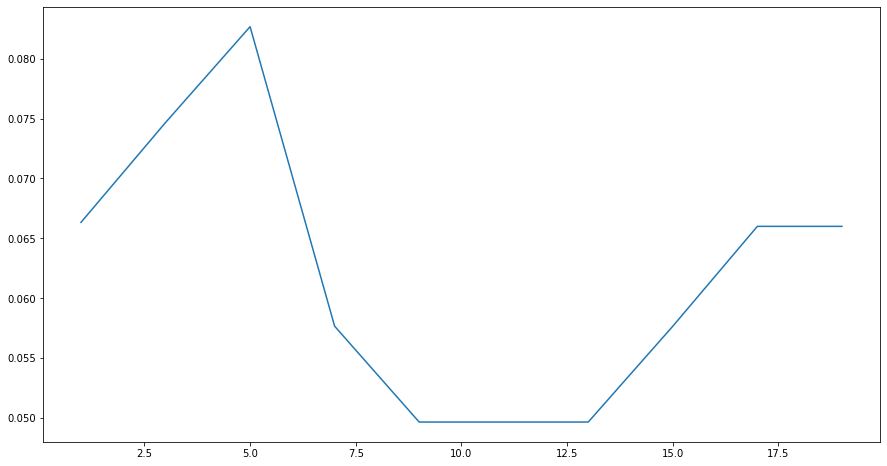

In [74]:
plt.plot(ed.keys(),ed.values())


# Naive Bayes

In [1]:
#Load all required library

### Question 1
#### Import Iris.csv

In [75]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Question 2
#### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [76]:
X=df.drop("Species",1)
y=df['Species']

X=X.drop('Id',1)

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Question 3
#### Find the distribution of target variable (Class)
#### And, Plot the distribution of target variable using histogram

C:\Users\Shakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

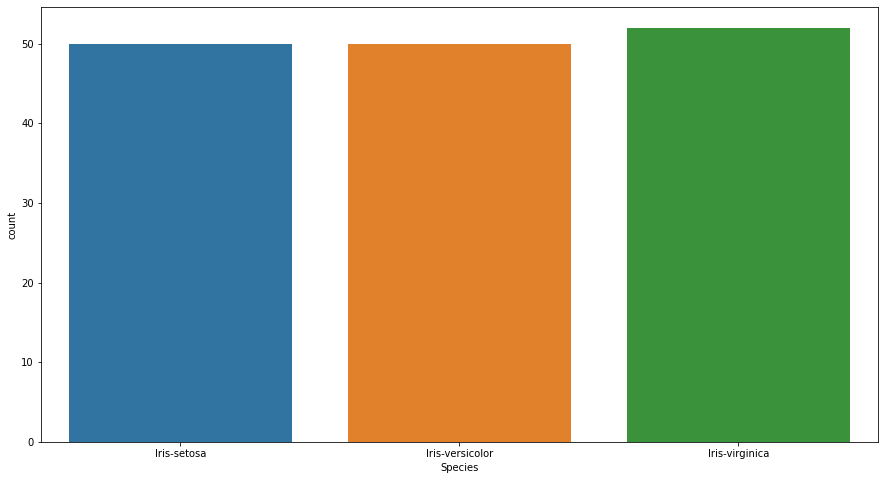

In [77]:
sns.countplot(y)

### Plot the distribution of target variable using histogram

<AxesSubplot:>

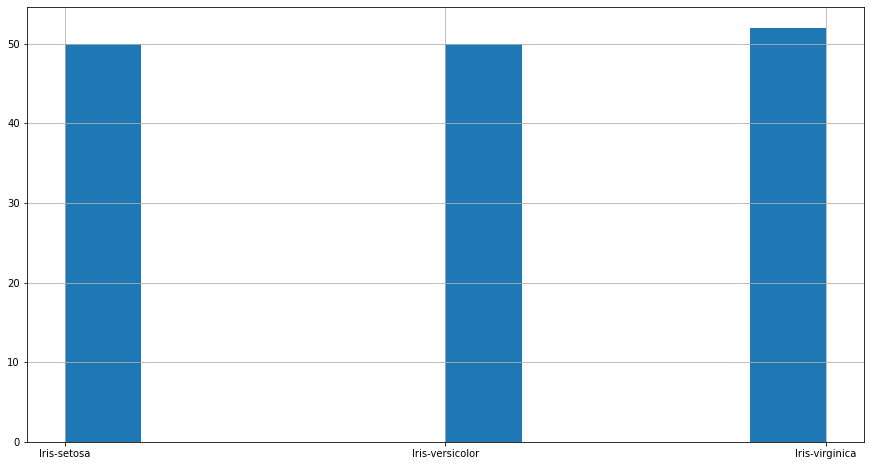

In [79]:
y.hist()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it.

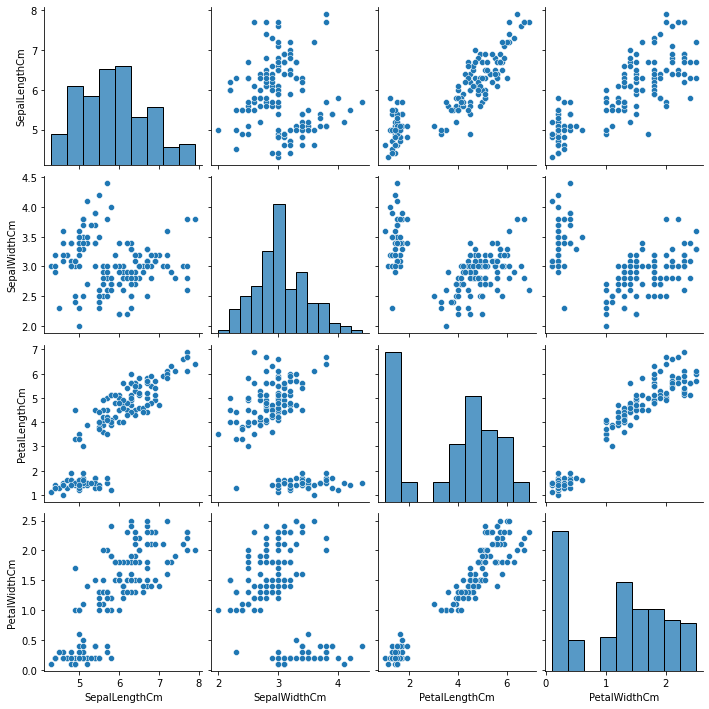

In [80]:
sns.pairplot(X)

#petal length has mostly linear relationship with petalwidth,and sepal length

### Question 3
#### Find Correlation among all variables and give your insights 

<AxesSubplot:>

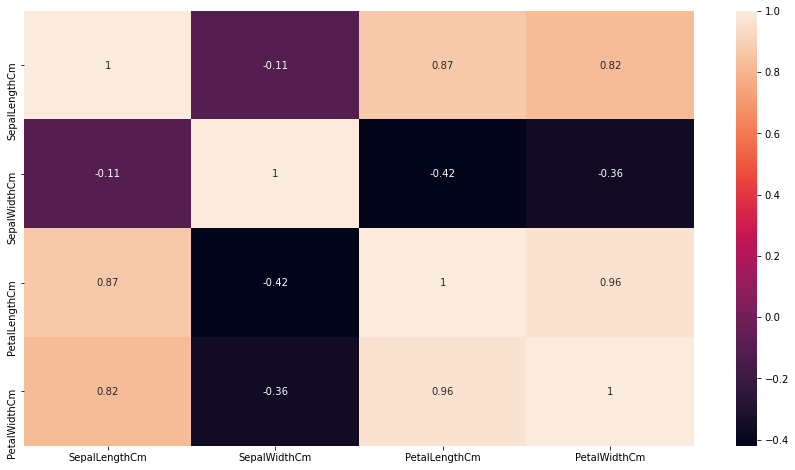

In [82]:
sns.heatmap(X.corr(),annot=True)
#the variables have high multicolinearity

### Question 4
#### Split data in Training and Validation in 80:20

In [83]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=22)

### Question 5
#### Do Feature Scaling 

<AxesSubplot:>

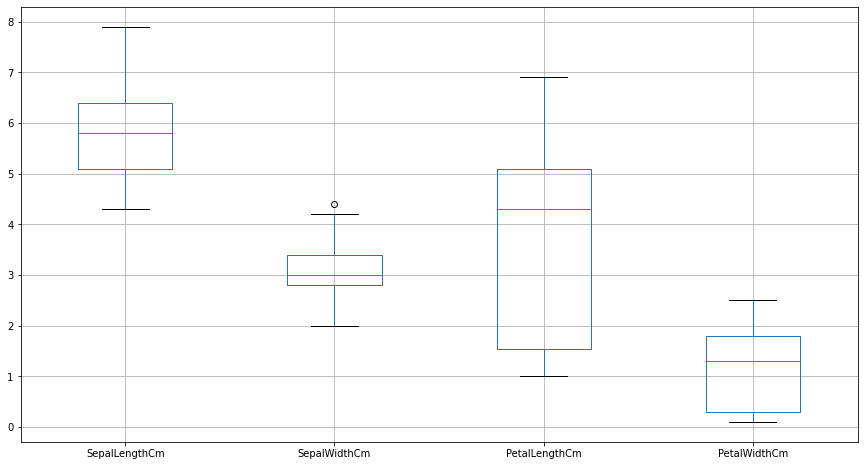

In [84]:
X_train.boxplot()
#Not much of outleirs, Standardisation will help.

In [85]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [88]:
xtrains=SS.fit_transform(X_train)

X_train_scaled=pd.DataFrame(xtrains,columns=X_train.columns,index=X_train.index)
X_train_scaled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,1.017630,-0.127400,0.820778,1.457119
131,2.440335,1.630345,1.499452,1.062414
72,0.543394,-1.225990,0.651109,0.404572
147,0.780512,-0.127400,0.820778,1.062414
123,0.543394,-0.786554,0.651109,0.799277
...,...,...,...,...
102,1.491865,-0.127400,1.216671,1.193982
100,0.543394,0.531755,1.273227,1.720255
44,-0.879311,1.630345,-1.045577,-1.042679
132,0.661953,-0.566836,1.047003,1.325550


In [89]:
y_train.head()

145     Iris-virginica
131     Iris-virginica
72     Iris-versicolor
147     Iris-virginica
123     Iris-virginica
Name: Species, dtype: object

In [103]:
#Scaling test data
xtest=SS.fit_transform(X_test)

X_test_scaled=pd.DataFrame(xtest,columns=X_test.columns,index=X_test.index)
X_test_scaled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
120,1.424234,0.490385,1.106169,1.398063
31,-0.613516,1.098462,-1.334902,-1.112483
149,0.065734,-0.117692,0.757445,0.737393
89,-0.477666,-1.637885,0.118116,0.076723
10,-0.613516,2.010577,-1.334902,-1.376751
96,-0.205966,-0.421731,0.234358,0.076723
138,0.201584,-0.117692,0.583082,0.737393
50,1.560084,0.490385,0.524962,0.208857
66,-0.341816,-0.117692,0.408720,0.340991
137,0.744984,0.186346,0.989928,0.737393


### Question 6 
#### Train and Fit NaiveBayes Model

In [106]:
X_train_scaled.isnull().sum()

SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
dtype: int64

In [107]:
X_train_scaled.fillna(value=X_train_scaled.median(),inplace=True)
X_test_scaled.fillna(value=X_test_scaled.median(),inplace=True)

In [108]:
X_train_scaled.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [109]:
from sklearn.naive_bayes import GaussianNB

nb6=GaussianNB()

nb6.fit(X_train_scaled,y_train)


GaussianNB()

### Question 7
#### Print Accuracy and Confusion Matrix and Conclude your findings

In [115]:
from sklearn.metrics import accuracy_score

y_pred=nb6.predict(X_test_scaled)

accuracy_score(y_test,y_pred)

1.0

<AxesSubplot:>

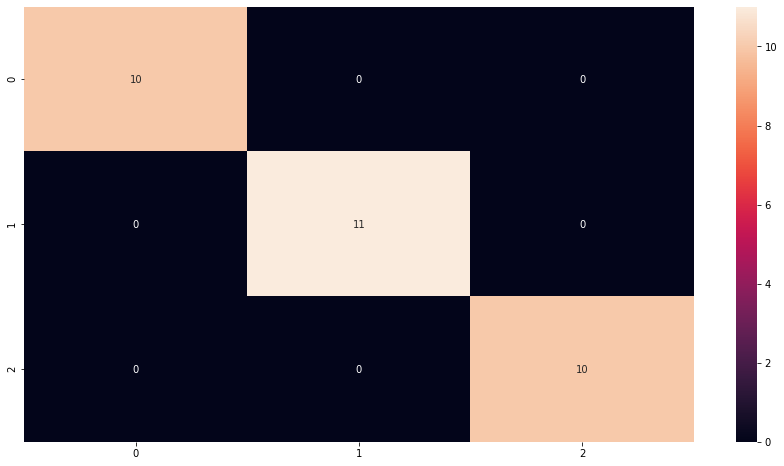

In [116]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)

In [ ]:
#All the predicted values and true values are same so the accuracy becomes 1.